<a href="https://colab.research.google.com/github/Srujansai19/Buddy-with-brain-/blob/main/BuddyWithBrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
#Loading the dataset
file_path = 'My_Dataset.xlsx'

df = pd.read_excel(file_path)

df.head()



,Date,Expenses,Category,Amount,Municipality,Province,Region,ID
0,2020-01-15,Transportation,Survival,41.0,Quezon City,Metro Manila,National Capital Region,E2020-1
1,2020-01-15,Transportation,Survival,40.0,Quezon City,Metro Manila,National Capital Region,E2020-2
2,2020-01-16,Food/Drinks,Optional,35.0,Quezon City,Metro Manila,National Capital Region,E2020-3
3,2020-01-16,Eating/Going Out,Optional,139.0,Quezon City,Metro Manila,National Capital Region,E2020-4
4,2020-01-16,Transportation,Survival,40.0,Quezon City,Metro Manila,National Capital Region,E2020-5


In [3]:
#Inspecting the data

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())



Shape: (1185, 8)
Columns: ['Date', 'Expenses', 'Category', 'Amount', 'Municipality', 'Province', 'Region', 'ID']


In [4]:
import pandas as pd
#Preprocessing the data
df = pd.read_excel(file_path, parse_dates=['Date'])

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df.dropna(subset=['Amount'], inplace=True)
print("Shape:", df.shape)


Shape: (1185, 8)


In [5]:
# to sum up expenses for each date
daily_expenses = df.groupby('Date')['Amount'].sum().reset_index()
daily_expenses.head()

,Date,Amount
0,2020-01-15,81.00
1,2020-01-16,1388.93
2,2020-01-18,340.00
3,2020-01-19,213.55
4,2020-01-20,708.17


In [6]:
from google.colab import files

#Download processed dataset
df.to_csv('processed_dataset.csv', index=False)
files.download('processed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

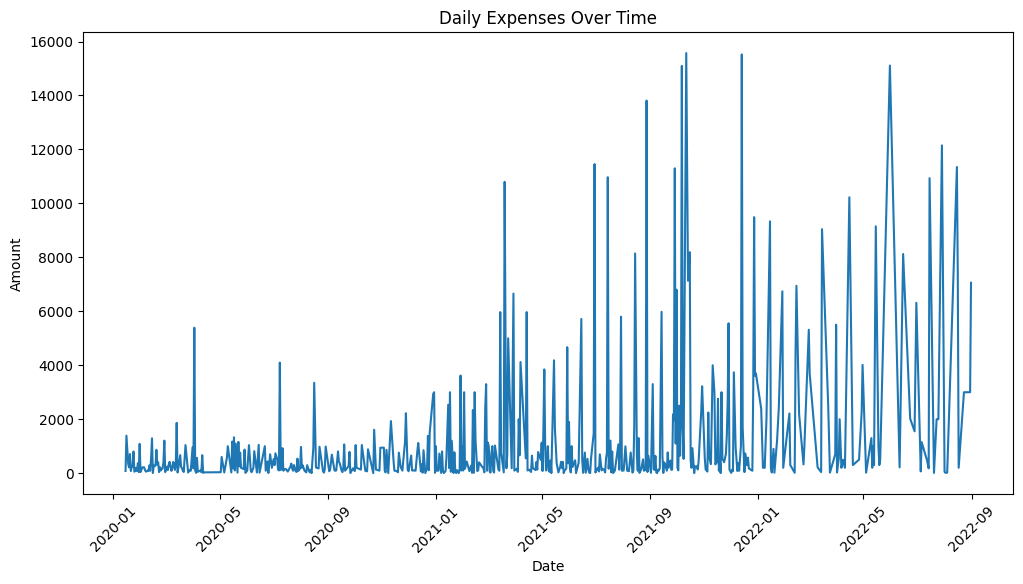

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting daily expenses over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_expenses, x='Date', y='Amount')
plt.title('Daily Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [12]:
#Finiding out outliers
Q1 = daily_expenses['Amount'].quantile(0.25)
Q3 = daily_expenses['Amount'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outliers = daily_expenses[daily_expenses['Amount'] > outlier_threshold]
print(outliers)

          Date    Amount
70  2020-04-02   5390.40
121 2020-07-08   4099.00
152 2020-08-16   3350.00
224 2020-12-29   2942.00
225 2020-12-30   3000.00
..         ...       ...
562 2022-08-15  11349.14
563 2022-08-16   7357.67
565 2022-08-23   3000.00
566 2022-08-30   3000.00
567 2022-08-31   7056.59

[74 rows x 2 columns]
